<center>Ejemplos de visualizaciones utilizando el dataset Titanic provisto por Kaggle</center>

Links de interés

https://pandas.pydata.org

https://matplotlib.org

https://seaborn.pydata.org


Importamos todas las librerías que vamos a utilizar

In [2]:
import numpy as np
import pandas as pd

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#### <center> Repaso b&aacute;sico de Pandas </center>

Cargamos el archivo de datos en un dataframe de Pandas

In [3]:
ds_titanic=pd.read_csv('./ds_titanic.csv')

Realizamos una copia del dataset sobre el cual vamos a trabajar para no alterar los datos originales

In [4]:
ds_trabajo=ds_titanic.copy()

Mostramos las primeras y últimas filas del dataset

In [5]:
ds_trabajo.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [6]:
ds_trabajo.tail(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Listar la cantidad de filas y columnas que tiene el dataset

In [7]:
ds_trabajo.shape

(891, 12)

Este dataset contiene 891 filas y 12 columnas

Listar los nombres de las columnas del dataset

In [8]:
ds_trabajo.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

<b>Descripción de los campos</b><br>
* PassengerId: Identificador del pasajero dentro de la tabla<br>
* Survived: Indica si el pasajero sobrevivió<br>
* Pclass: clase de pasajero primera(1), segunda (2) o tercera (3) <br>
* Name: Nombre del pasajero <br>
* Sex: Sexo del pasajero<br>
* Age: Edad<br>
* SibSp: Cantidad de hermanas/os o esposas/os a bordo<br>
* Parch: Cantidad de padres o hijos a bordo<br>
* Ticket: Número de ticket<br>
* Fate: Tarifa <br>
* Cabin: Cabina en la cual se encuentra alojado el pasajero<br>
* Embarked: Puerta de embarque<br>

Mostrar el tipo de cada columna del dataframe

In [9]:
ds_trabajo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
ds_trabajo.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Cambiar nombre a una columna

In [11]:
columnas={"Pclass":"PassengerClass"}
ds_trabajo.rename(columns = columnas, inplace = True)
ds_trabajo.head(2)

,PassengerId,Survived,PassengerClass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


Listar la cantidad de datos nulos por columna

In [12]:
ds_trabajo.isna()

,PassengerId,Survived,PassengerClass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
print(ds_trabajo.isna().sum())

PassengerId         0
Survived            0
PassengerClass      0
Name                0
Sex                 0
Age               177
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin             687
Embarked            2
dtype: int64


Listar la cantidad de datos no nulos por columna

In [14]:
print(ds_trabajo.count())

PassengerId       891
Survived          891
PassengerClass    891
Name              891
Sex               891
Age               714
SibSp             891
Parch             891
Ticket            891
Fare              891
Cabin             204
Embarked          889
dtype: int64


Analizar algunas combinaciones de variables

El método pd.crosstab en pandas se utiliza para calcular tablas de contingencia o tablas cruzadas a partir de datos en un DataFrame. Estas tablas son útiles para resumir y visualizar la relación entre dos o más variables categóricas en un conjunto de datos. La función pd.crosstab toma dos o más columnas de un DataFrame y crea una tabla que muestra la frecuencia de ocurrencia de combinaciones de valores de esas columnas.

In [15]:
pd.crosstab(ds_trabajo['Survived'],ds_trabajo['Sex'])

Sex,female,male
Survived,,
0,81,468
1,233,109


In [16]:
ds_trabajo.groupby(['PassengerClass','Sex'])['Survived'].sum()

PassengerClass  Sex   
1               female    91
                male      45
2               female    70
                male      17
3               female    72
                male      47
Name: Survived, dtype: int64

Mostrar información de resumen del dataset

In [17]:
ds_trabajo.describe()

,PassengerId,Survived,PassengerClass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Seleccionar fila por posición

In [18]:
ds_trabajo.iloc[0]

PassengerId                             1
Survived                                0
PassengerClass                          3
Name              Braund, Mr. Owen Harris
Sex                                  male
Age                                  22.0
SibSp                                   1
Parch                                   0
Ticket                          A/5 21171
Fare                                 7.25
Cabin                                 NaN
Embarked                                S
Name: 0, dtype: object

Seleccionar columna por posición

In [19]:
ds_trabajo.iloc[:,0]

0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64

##### Seleccionar columna por nombre

In [20]:
ds_trabajo.loc[:,"PassengerId"]   #ds_trabajo["PassengerId"]

0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64

In [21]:
ds_trabajo["PassengerId"]

0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64

##### Selección de filas en función de características de columnas

In [22]:
ds_trabajo.loc[:,"Survived"]==1

0      False
1       True
2       True
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Name: Survived, Length: 891, dtype: bool

In [23]:
ds_trabajo["Survived"]==1

0      False
1       True
2       True
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Name: Survived, Length: 891, dtype: bool

In [24]:
ds_trabajo.loc[ds_trabajo.loc[:,"Survived"]==1,:]

,PassengerId,Survived,PassengerClass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


##### Eliminar columma

In [25]:
ds_trabajo.drop('PassengerId', axis='columns', inplace=True)  #Elimina columna sobre el mismo dataframe
ds_trabajo.columns.tolist()

['Survived',
 'PassengerClass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

##### Eliminar fila por condición

In [26]:
ds_trabajo_sobrevivientes=ds_trabajo.copy()
ds_trabajo_sobrevivientes.drop(ds_trabajo[ds_trabajo["Survived"]==0].index, axis='index',inplace=True)
ds_trabajo_sobrevivientes.shape

(342, 11)

In [27]:
ds_trabajo_sobrevivientes=ds_trabajo.copy()
ds_trabajo_sobrevivientes.drop(ds_trabajo.loc[ds_trabajo.loc[:,"Survived"]==0,:].index, axis='index', inplace=True)
ds_trabajo_sobrevivientes.shape

(342, 11)

In [28]:
ds_trabajo_sobrevivientes.head()

,Survived,PassengerClass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


##### Cambiar valores de features

In [ ]:
## NO CORRER

ds_trabajo_reemplazo_valores=ds_trabajo.copy()

ds_trabajo_reemplazo_valores.loc[ds_trabajo_reemplazo_valores.loc[:,"Survived"]==1,"Survived"]="Yes"
ds_trabajo_reemplazo_valores.loc[ds_trabajo_reemplazo_valores.loc[:,"Survived"]==0,"Survived"]="No"

ds_trabajo_reemplazo_valores.head()

,Survived,PassengerClass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,No,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,Yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,No,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
## NO CORRER

ds_trabajo.loc[:,"Survived"].replace(to_replace=[0,1],value=["No","Yes"],inplace=True)

ds_trabajo.head()

,Survived,PassengerClass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,No,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,Yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,No,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### <center> Análisis exploratorio inicial </center>

* matplotlib: es una librería open source de Python,especializada en la creación de gráficos en dos dimensiones,  en la que se pueden crear visualizaciones animadas, estáticas e interactivas



> https://matplotlib.org/


> https://matplotlib.org/ <br>
> https://matplotlib.org/cheatsheets/




* seaborn : es una biblioteca para crear gráficos estadísticos en Python. Está basada en Matplotlib, y se integra con las estructuras de Pandas.

> https://seaborn.pydata.org/

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Gráfico de barras

Gráfico de frecuencias para variables cualitativas

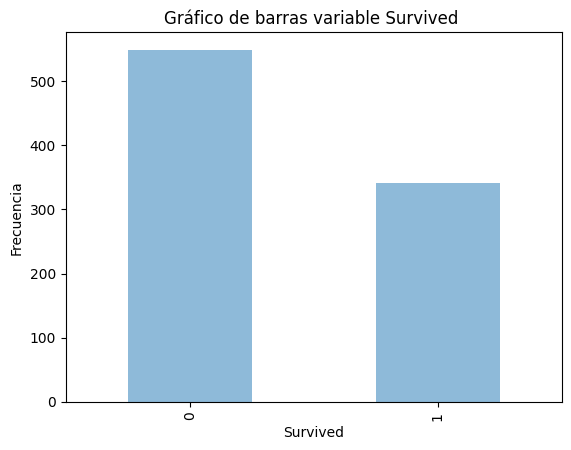

In [31]:
#Gráfico de barras con Pandas

grf_ds=ds_trabajo['Survived'].value_counts().plot.bar(alpha=0.5 , title="Gráfico de barras variable Survived " , xlabel="Survived" , ylabel="Frecuencia")

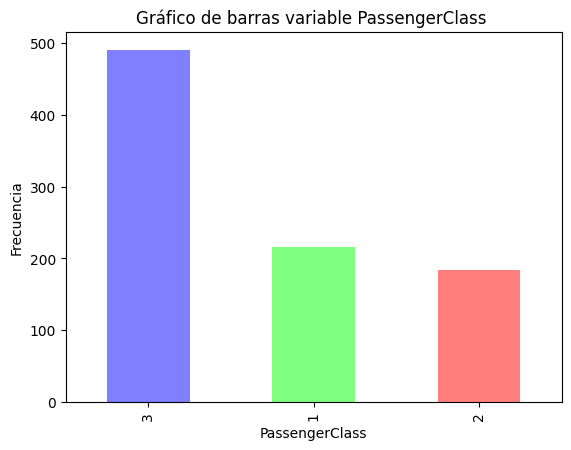

In [48]:
colores=[(0,0,1),(0,1,0),(1,0,0)]
grf=ds_trabajo['PassengerClass'].value_counts().plot.bar(alpha=0.5,color=colores, title="Gráfico de barras variable PassengerClass ", xlabel="PassengerClass",ylabel="Frecuencia")
#plot(kind="bar",alpha=0.5,color=colores)

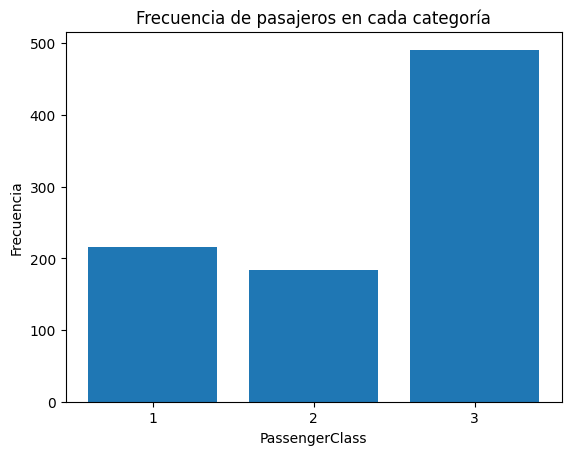

In [33]:
#Gráfico de barras con Matplotlib
ds_agrupado_Pclass=ds_trabajo.groupby(['PassengerClass']).count()  #Calculo la frecuencia de cada categoría

ds_agrupado_Pclass

eje_x = ds_agrupado_Pclass.index.tolist()   ## Declaramos valores para el eje x
eje_y = ds_agrupado_Pclass['Survived'].tolist()  ## Declaramos valores para el eje y

plt.locator_params('x', nbins=3)
plt.bar(eje_x, eje_y) ## Creamos Gráfica

plt.ylabel('Frecuencia') # Leyenda en el eje y
plt.xlabel('PassengerClass') # Leyenda en el eje x
plt.title('Frecuencia de pasajeros en cada categoría') ## Título de Gráfica

plt.show() ## Mostramos Gráfica

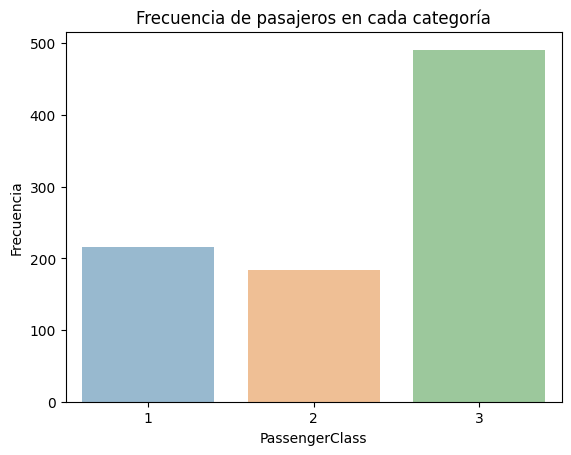

In [34]:
#Gráfico de barras con Seaborn
ds_agrupado_Pclass=ds_trabajo.groupby(['PassengerClass']).count()  #Calculo la frecuencia de cada categoría

eje_x = ds_agrupado_Pclass.index.tolist()   ## Declaramos valores para el eje x
eje_y = ds_agrupado_Pclass['Survived'].tolist()  ## Declaramos valores para el eje y

sns_bar_plot=sns.barplot(x=eje_x, y=eje_y, data=ds_agrupado_Pclass ,alpha=0.5).set(title="Frecuencia de pasajeros en cada categoría",ylabel='Frecuencia',xlabel='PassengerClass')

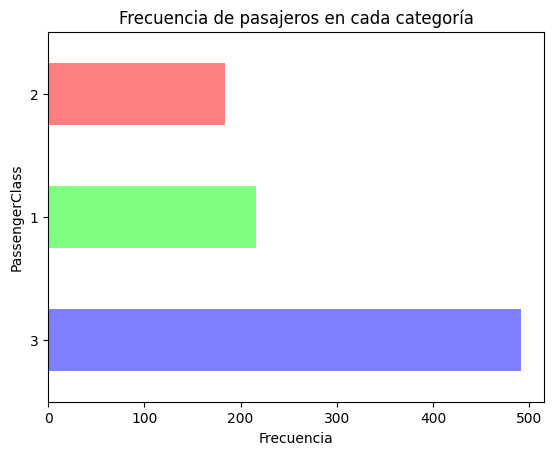

In [35]:
colores=[(0,0,1),(0,1,0),(1,0,0)]
grf=ds_trabajo['PassengerClass'].value_counts().plot.barh(alpha=0.5,color=colores, title="Frecuencia de pasajeros en cada categoría",xlabel='Frecuencia',ylabel='PassengerClass')
#plot(kind="barh",alpha=0.5,color=colores)

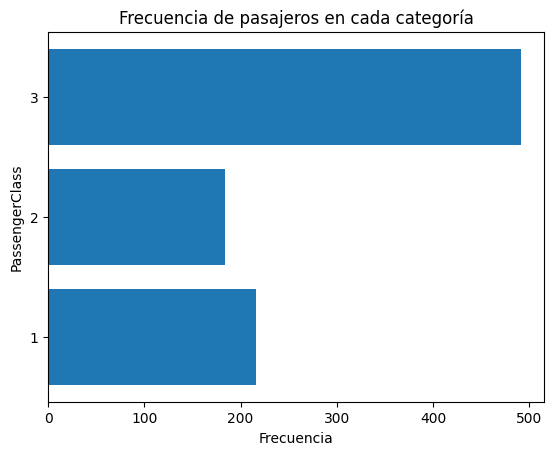

In [36]:
#MatplotLib
ds_agrupado_Pclass=ds_trabajo.groupby(['PassengerClass']).count()  #Calculo la frecuencia de cada categoría

eje_x = ds_agrupado_Pclass.index.tolist()   ## Declaramos valores para el eje x
eje_y = ds_agrupado_Pclass['Survived'].tolist()  ## Declaramos valores para el eje y

plt.locator_params('y', nbins=3)
plt.barh(eje_x, eje_y) ## Creamos Gráfico

plt.ylabel('PassengerClass') ## Leyenda en el eje y
plt.xlabel('Frecuencia') ## Leyenda en el eje x
plt.title('Frecuencia de pasajeros en cada categoría') ## Título de Gráfica

plt.show() ## Mostramos Gráfico

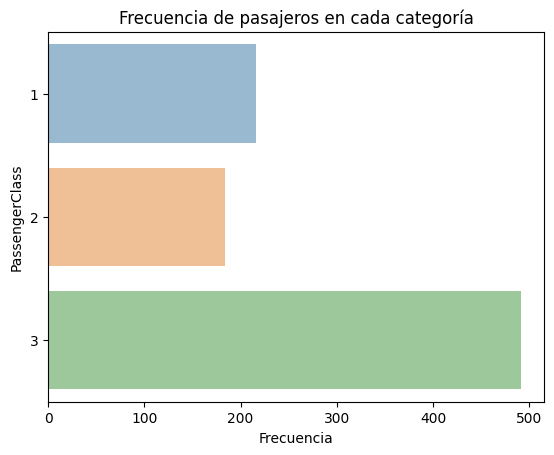

In [37]:
#Seaborn
ds_agrupado_Pclass=ds_trabajo.groupby(['PassengerClass']).count()  #Calculo la frecuencia de cada categoría

eje_y = ds_agrupado_Pclass.index.tolist()   ## Declaramos valores para el eje x
eje_x = ds_agrupado_Pclass['Survived'].tolist()  ## Declaramos valores para el eje y

sns_bar_plot=sns.barplot(x=eje_x, y=eje_y, data=ds_agrupado_Pclass ,alpha=0.5, orient="h").set(title="Frecuencia de pasajeros en cada categoría",xlabel='Frecuencia',ylabel='PassengerClass')

#### Histogramas

Gráfico de frecuencias para variables cuantitativas (en caso de variables cuantitativas se utiliza un gráfico de barras)

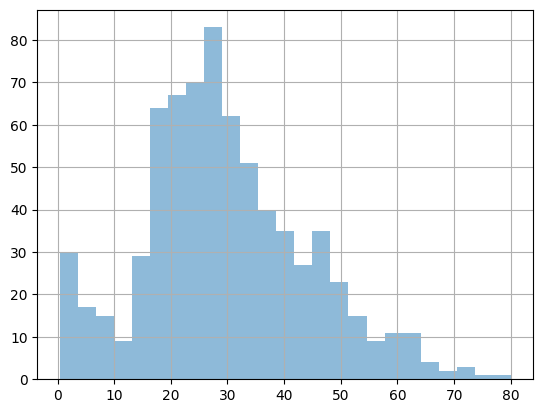

In [49]:
# Histogramas con Pandas

grf=ds_trabajo['Age'].hist(alpha=0.5,bins=25)

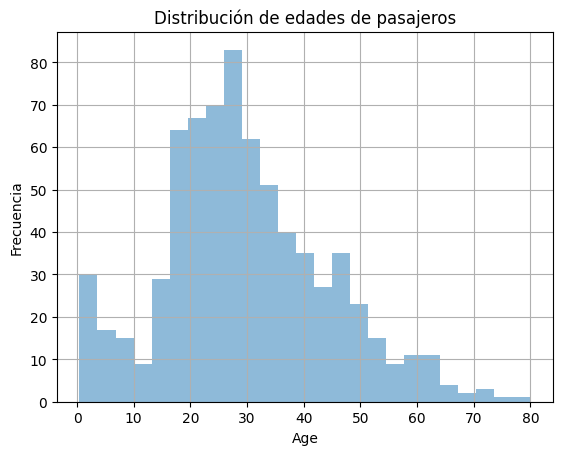

In [50]:
# Histogramas con matplotlib

plt.title('Distribución de edades de pasajeros')
plt.hist(ds_trabajo['Age'], bins = 25 , alpha = 0.5)
plt.xlabel("Age")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

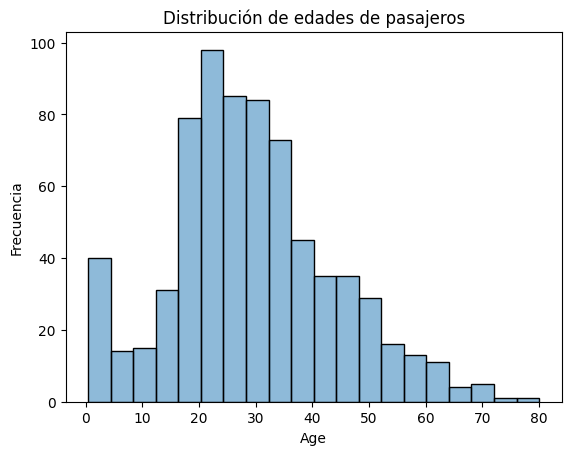

In [40]:
#Histogramas con Seaborn
sns_hist=sns.histplot(data=ds_trabajo['Age'], alpha = 0.5).set(title="Distribución de edades de pasajeros",xlabel="Age",ylabel="Frecuencia")

#### Gráficos de densidad

Representación de la distribución de una variables <br>
(Histograma suavizado)

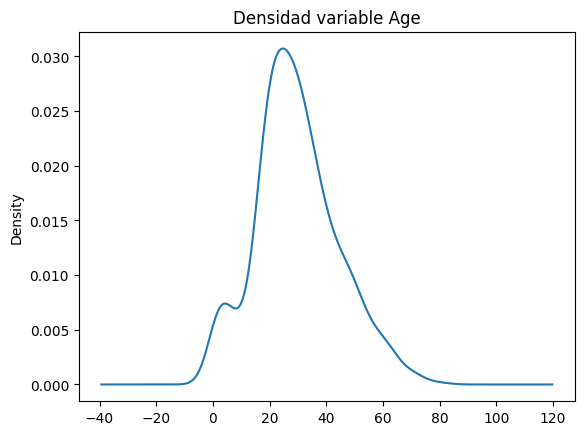

In [41]:
# Gráficos de densidad con Pandas
grf=ds_trabajo['Age'].plot.kde(title="Densidad variable Age",xlabel="Age",ylabel="Densidad")

Dar desde ACÁ!!

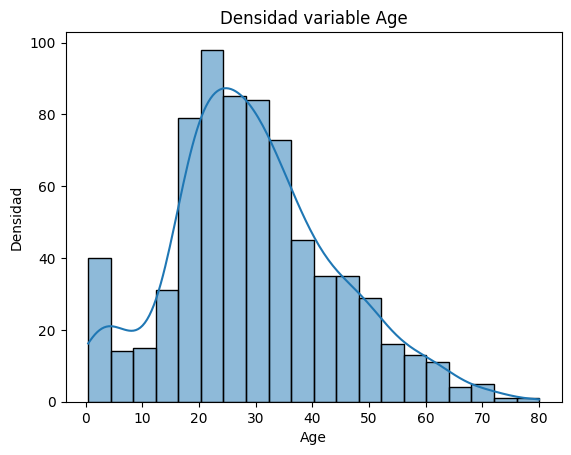

In [42]:
# Gráficos de densidad con Seaborn---
sns_hist=sns.histplot(data=ds_trabajo['Age'], kde=True, alpha = 0.5).set(title="Densidad variable Age",xlabel="Age",ylabel="Densidad")

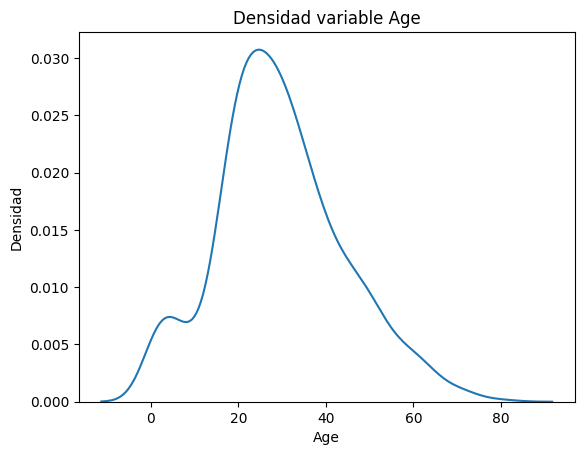

In [43]:
# Gráficos de densidad con Seaborn
sns_hist=sns.kdeplot(data=ds_trabajo['Age']).set(title="Densidad variable Age",xlabel="Age",ylabel="Densidad")

In [ ]:
# Boxplot

<Axes: title={'center': 'Grafico boxplot'}, ylabel='Edad'>

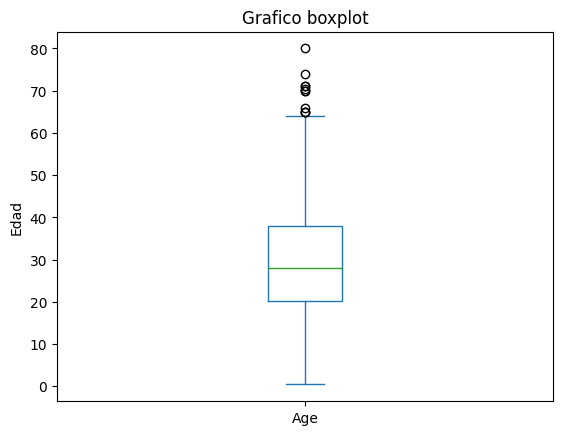

In [54]:
ds_trabajo['Age'].plot.box(title="Grafico boxplot",ylabel="Edad")

[Text(0.5, 1.0, 'Boxplot edades'), Text(0, 0.5, 'Edad')]

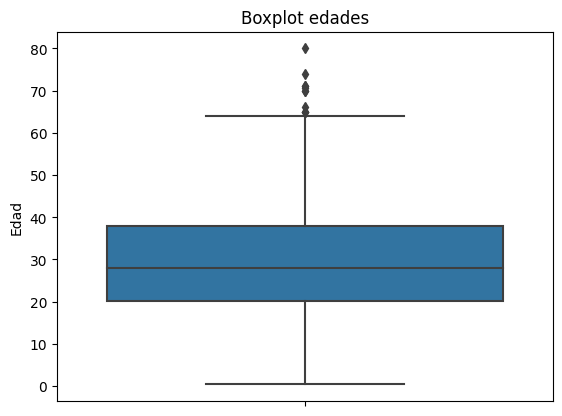

In [57]:
sns.boxplot(y="Age",data=ds_trabajo).set(title="Boxplot edades",ylabel="Edad")

[Text(0.5, 1.0, 'Boxplot Precios'), Text(0, 0.5, 'Precio')]

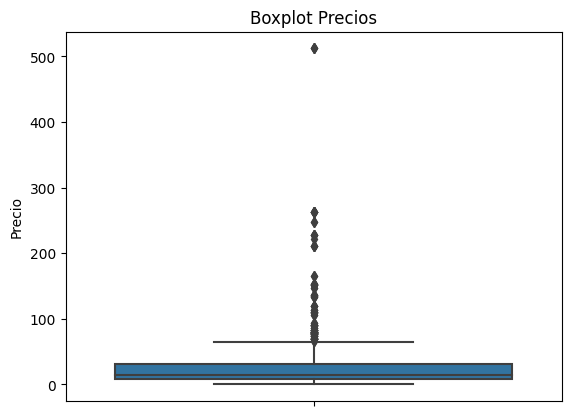

In [59]:
sns.boxplot(y="Fare",data=ds_trabajo).set(title="Boxplot Precios",ylabel="Precio")

<Axes: >

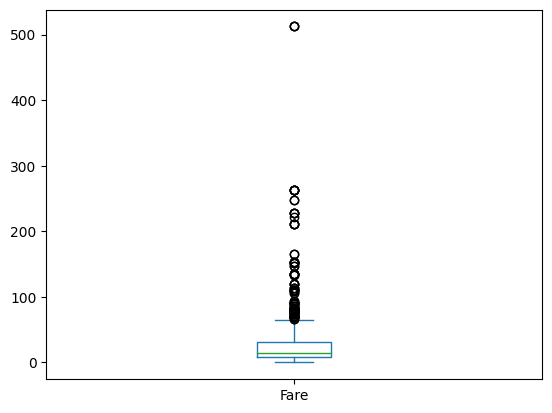

In [61]:
ds_trabajo["Fare"].plot.box()

In [44]:
ds_pinguinos=pd.read_csv('./penguins.csv')

In [63]:
ds_trabajo.head()

,Survived,PassengerClass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='PassengerClass', ylabel='Fare'>

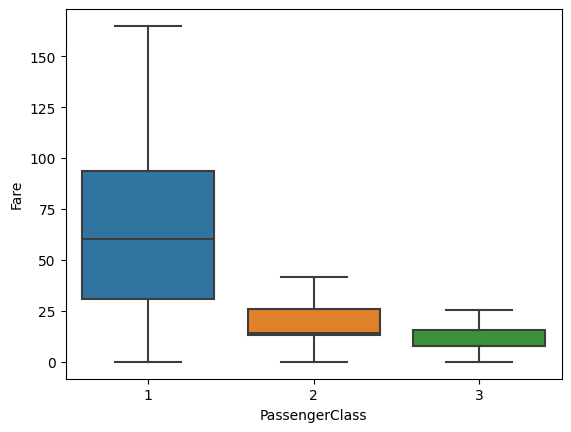

In [65]:
#Uno mas completo
# showfliers=False me saca los outliers
sns.boxplot(x="PassengerClass",y="Fare",data=ds_trabajo, showfliers=False)

<Axes: xlabel='Survived', ylabel='Age'>

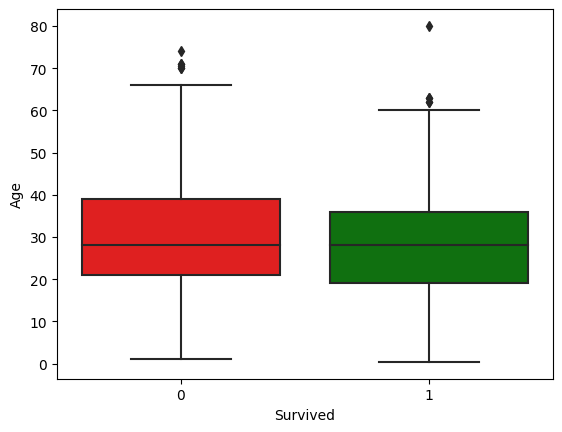

In [67]:
sns.boxplot(x="Survived",y="Age",data=ds_trabajo, palette=["r","g"])

<Axes: xlabel='Survived', ylabel='Fare'>

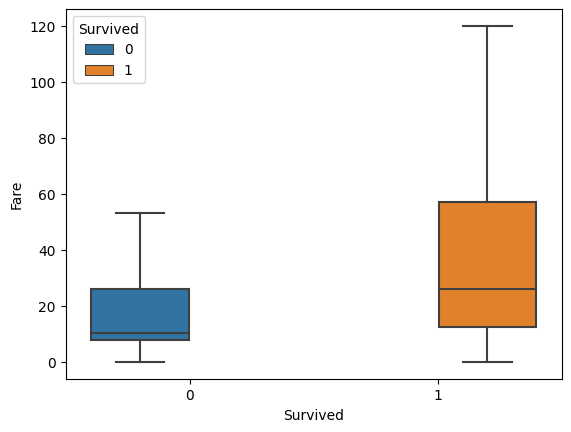

In [85]:
sns.boxplot(x="Survived",y="Fare",data=ds_trabajo,hue="Survived",showfliers=False)

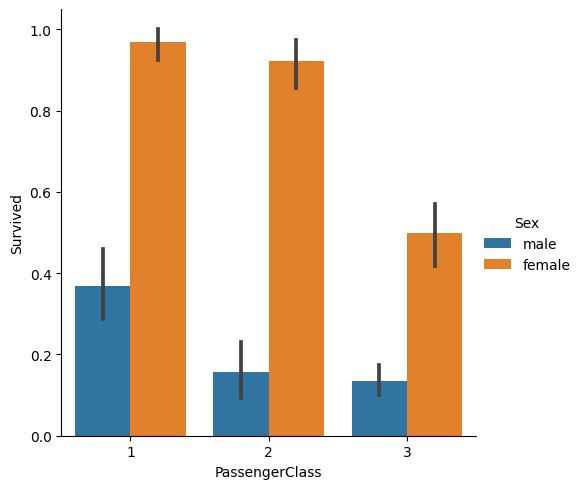

In [73]:
sns.catplot(x="PassengerClass",y="Survived",hue="Sex",data=ds_trabajo,kind="bar")

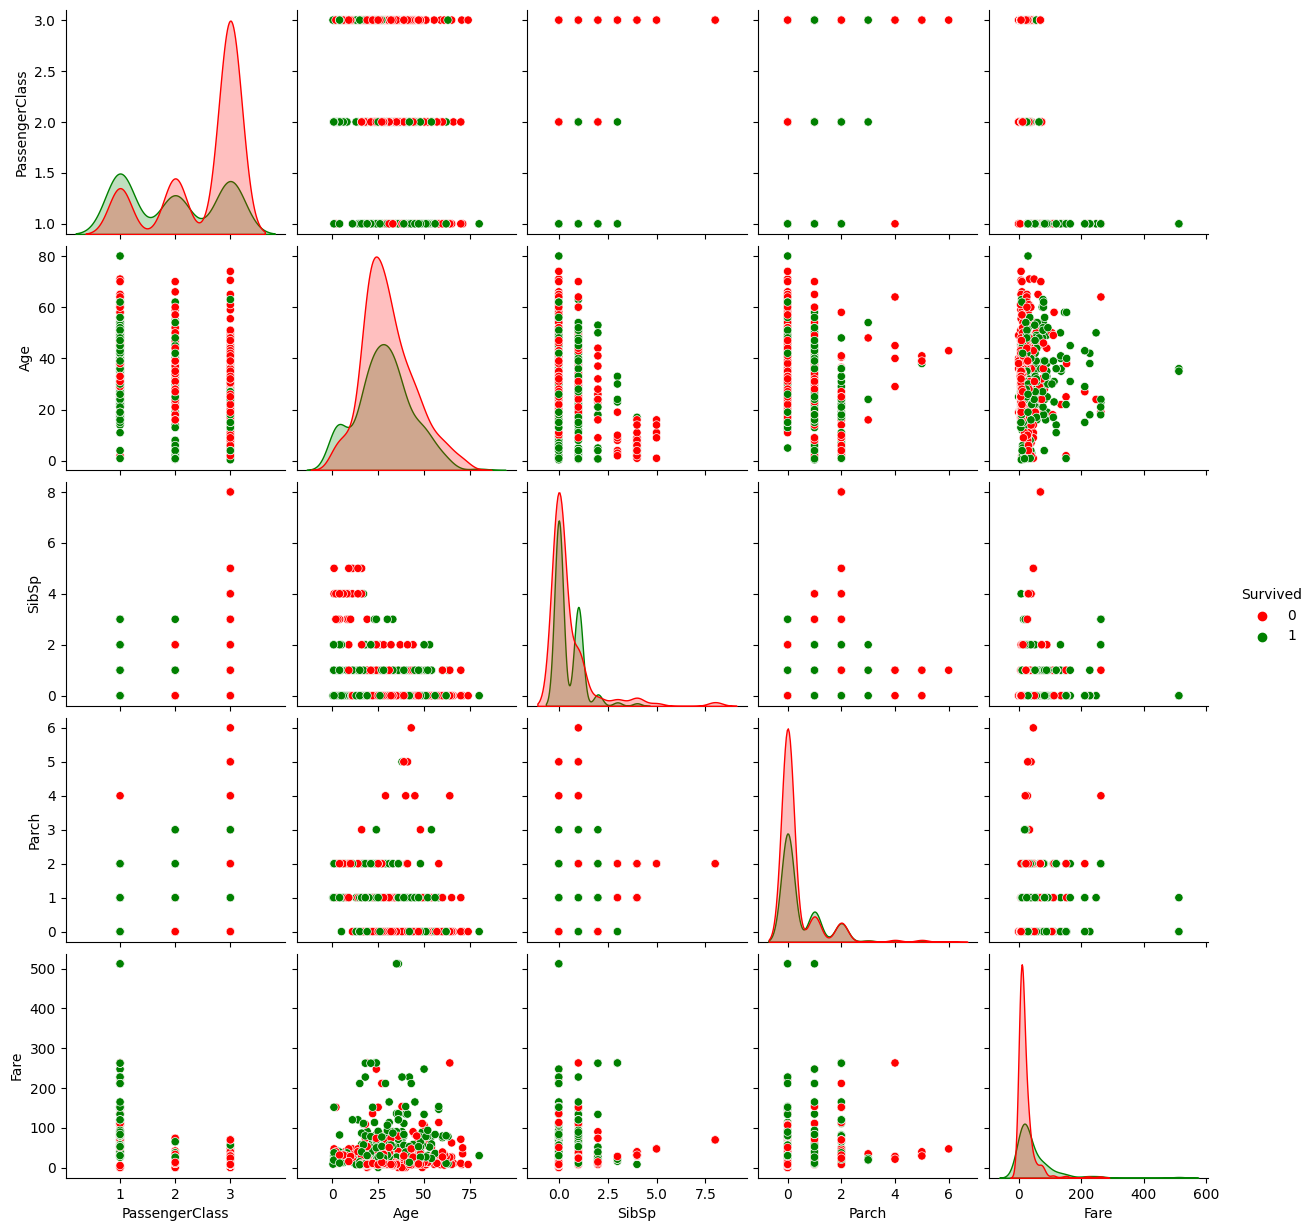

In [79]:
sns.pairplot(data=ds_trabajo, hue="Survived", palette=["r", "g"])

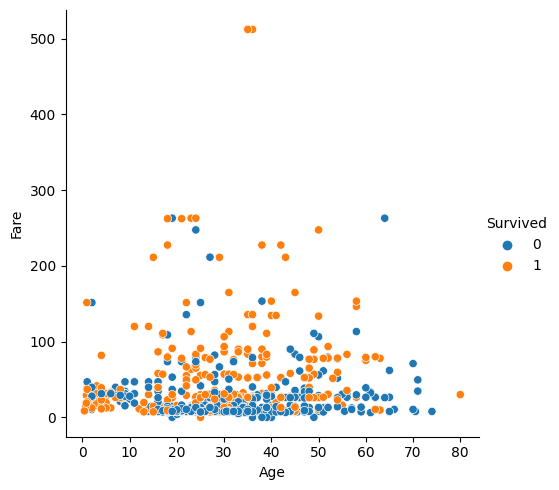

In [82]:
sns.relplot(data=ds_trabajo,x="Age",y="Fare",hue="Survived")

<Axes: xlabel='Survived', ylabel='Fare'>

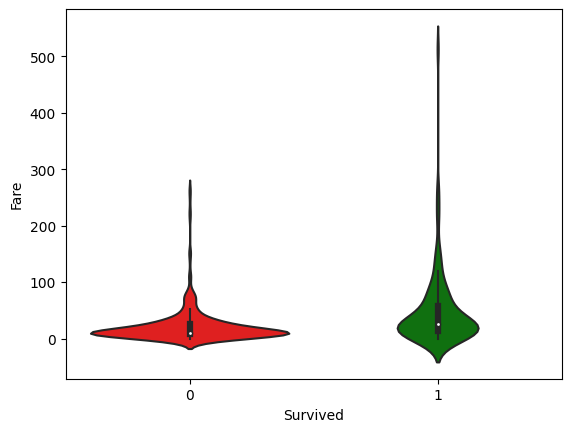

In [83]:
sns.violinplot(x="Survived",y="Fare",data=ds_trabajo,palette=["r","g"])

In [87]:
pinguinos=pd.read_csv('./penguins.csv')
pinguinos.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [89]:
pinguinos.describe()

,rowid,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,344.000000,342.000000,342.000000,342.000000,342.000000,344.000000
mean,172.500000,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,99.448479,5.459584,1.974793,14.061714,801.954536,0.818356
min,1.000000,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,86.750000,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,172.500000,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,258.250000,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,344.000000,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [90]:
pinguinos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [91]:
pinguinos.isna().sum()

rowid                 0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [94]:
pinguinos["bill_length_mm"] = pinguinos["bill_length_mm"].fillna(value = pinguinos["bill_length_mm"].mean())

In [95]:
pinguinos["bill_depth_mm"] = pinguinos["bill_depth_mm"].fillna(value = pinguinos["bill_depth_mm"].mean())
pinguinos["flipper_length_mm"] = pinguinos["flipper_length_mm"].fillna(value = pinguinos["flipper_length_mm"].mean())
pinguinos["body_mass_g"] = pinguinos["body_mass_g"].fillna(value = pinguinos["body_mass_g"].mean())

In [110]:
pinguinos["sex"] = pinguinos["sex"].fillna("male")

In [111]:
pinguinos.isna().sum()

rowid                0
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

<Axes: xlabel='species', ylabel='count'>

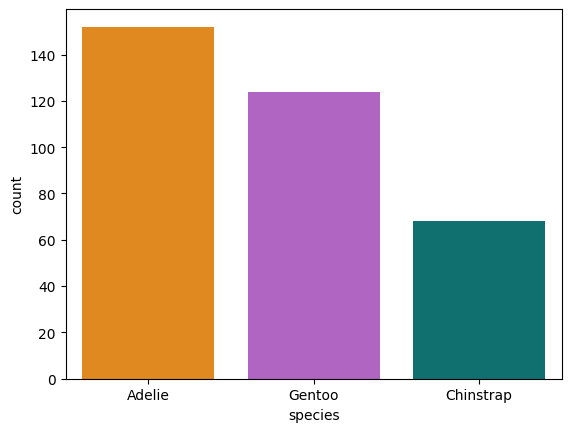

In [112]:
sns.countplot(x='species',data=pinguinos,palette=('DarkOrange', 'MediumOrchid', 'Teal'))

<Axes: xlabel='island', ylabel='count'>

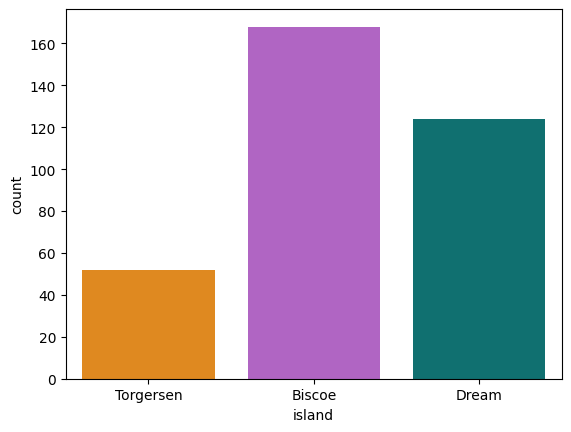

In [113]:
sns.countplot(x='island',data=pinguinos,palette=('DarkOrange', 'MediumOrchid', 'Teal'))

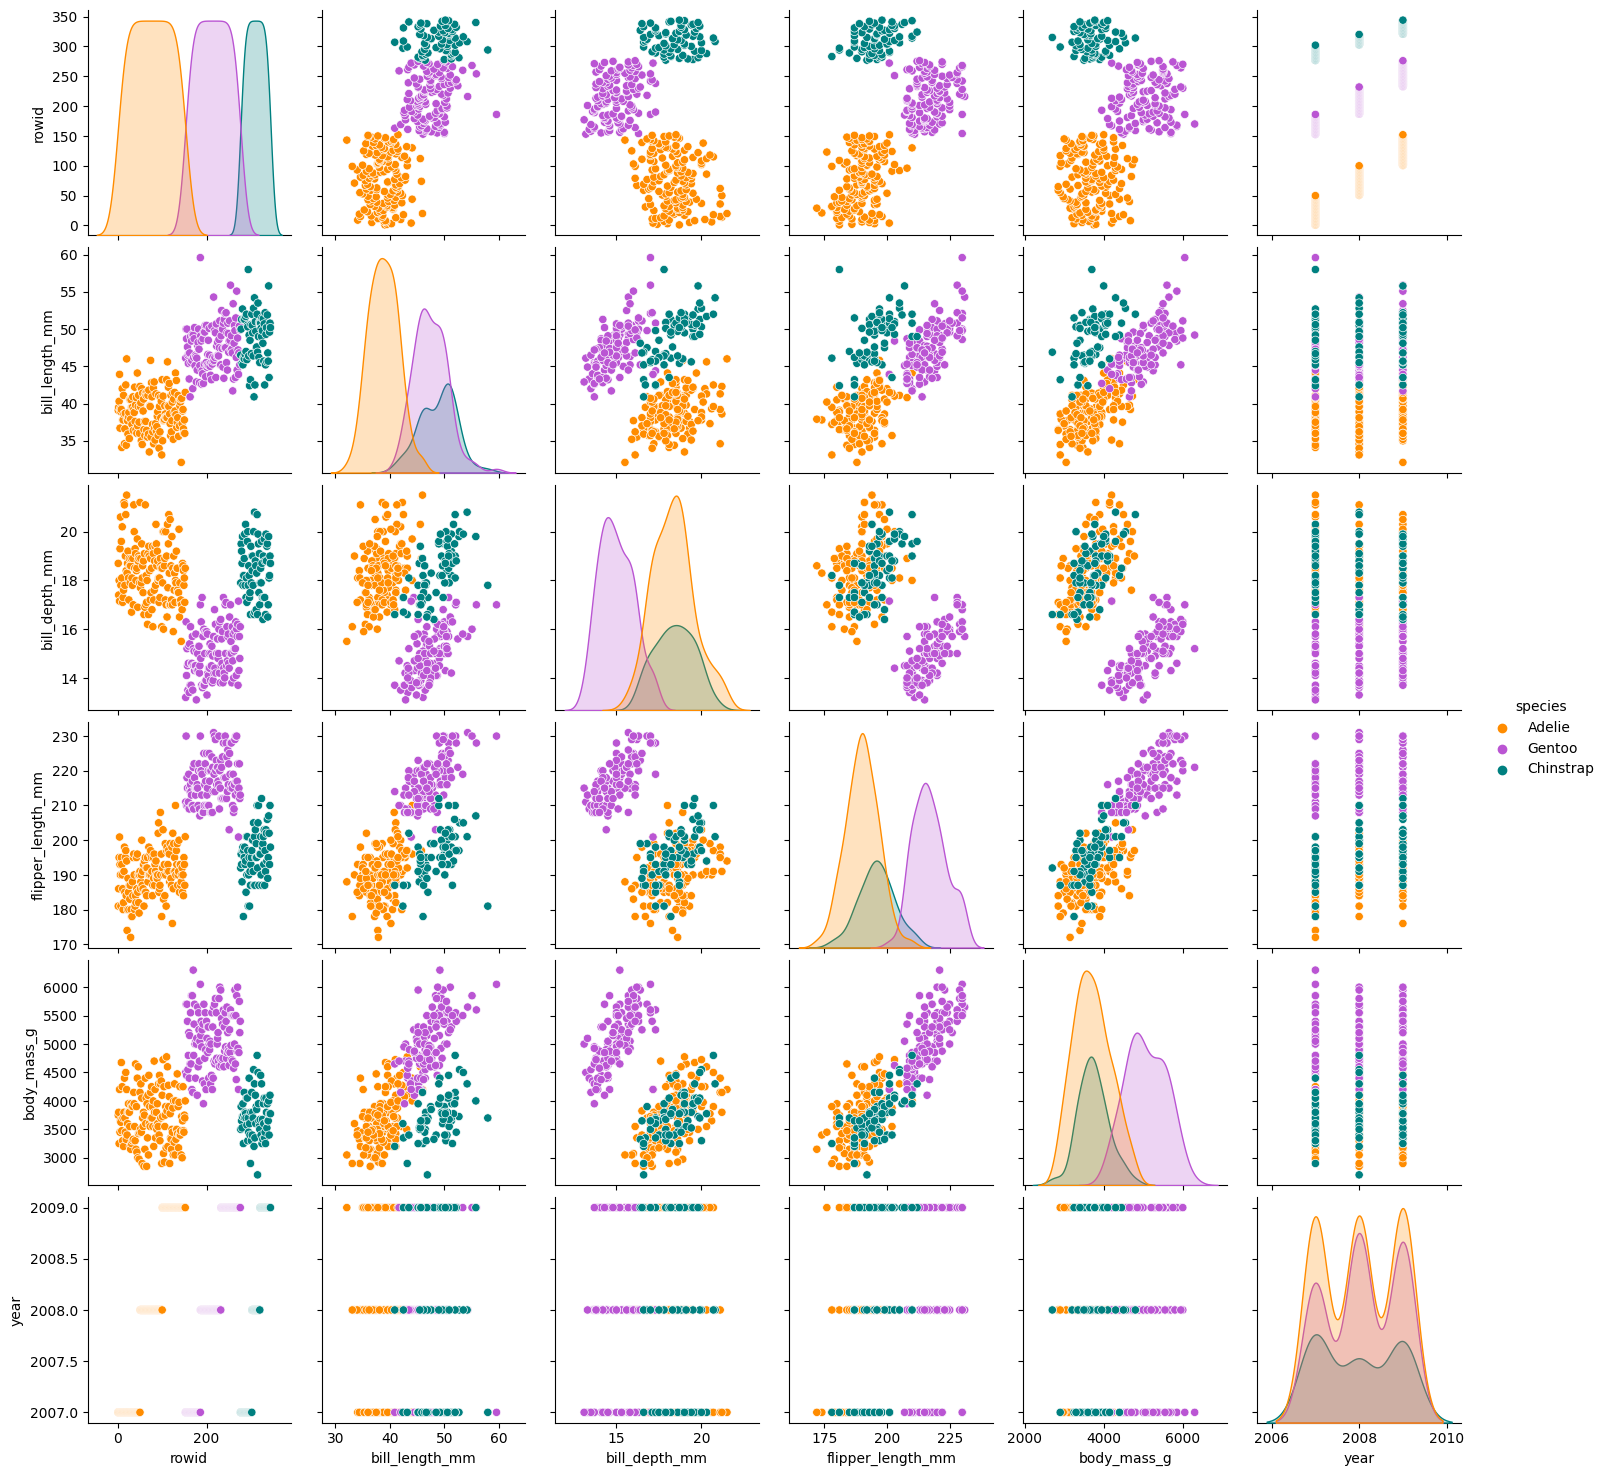

In [114]:
sns.pairplot(data=pinguinos,hue='species',palette=('DarkOrange', 'MediumOrchid', 'Teal'))

In [115]:
pinguinos.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,male,2007
1,2,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,female,2007
2,3,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,female,2007
3,4,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,MALE,2007
4,5,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,female,2007


<Axes: xlabel='sex', ylabel='body_mass_g'>

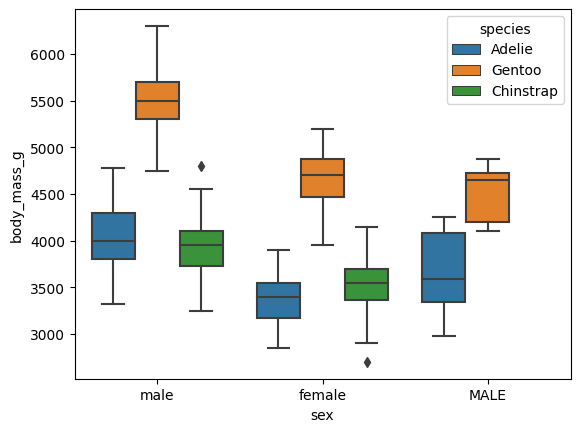

In [117]:
sns.boxplot(x =pinguinos.sex,y=pinguinos.body_mass_g,hue=pinguinos.species)

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

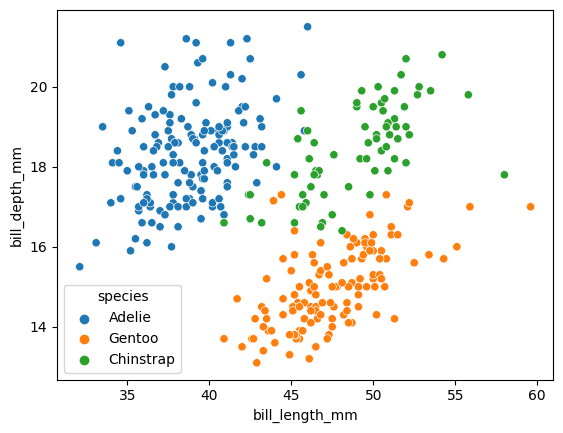

In [119]:
sns.scatterplot(x=pinguinos.bill_length_mm,y= pinguinos.bill_depth_mm,hue=pinguinos.species)

#### a) Cargar los datos en un dataframe de pandas.

* ¿Cuál es la cantidad de filas del datset? ¿y la cantidad de columnas?
* ¿Cuáles son los tipos de datos de cada columna?
* Mostrar los datos de las 5 primeras filas
* Mostrar si existen datos faltantes (N/A)

### b) Medidas de resumen

* Cuál es la cantidad de observaciones de cada especie
* Crear un nuevo dataframe **iris_mean** que contenga el promedio de cada variable del dataset agrupado por especie
* Crear un nuevo dataframe **iris_resumen_setosa** que contenga las medidas de resumen para la espcie setosa.(cantidad total, media, minimo,maximo,desviacion estandar y cuantiles)

###c)  Realizar los siguientes gráficos:
* grafico de barras para la cantidad de obsevaciones por especie
* scatter plot el largo del sépalo y el ancho del sépalo coloreando las observaciones por especie.
* scatter plot el largo del pétalo y el ancho del pétalo coloreando las observaciones por especie.
* histograma del largo del petalo para cada especie
* boxplot comparativos por especie para cada variable